In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

df = pd.read_csv("Crash_Data.csv")

df = df[[
  'Time',
  'Time of day',
  'Day of week',
  'Month',
  'Year',
  'Dayweek',
  'Crash Type',
  'Road User',
  'Gender',
  'Age',
  'Age Group',
  'State',
  'Speed Limit',
  'Bus Involvement',
  'Articulated Truck Involvement',
  'Christmas Period',
  'Easter Period',
]]

df_with_time = df.copy()
df.drop('Time', axis=1, inplace=True)

df.dropna(axis=0, inplace=True)

df.drop(df[df['Speed Limit'] == 'Unspecified'].index, inplace=True)
df.drop(df[df['Speed Limit'] == '<40'].index, inplace=True)
df.drop(df[df['Speed Limit'] == -9].index, inplace=True)

df['Speed Limit'] = pd.to_numeric(df['Speed Limit'])

df.head(5)

,Time of day,Day of week,Month,Year,Dayweek,Crash Type,Road User,Gender,Age,Age Group,State,Speed Limit,Bus Involvement,Articulated Truck Involvement,Christmas Period,Easter Period
1,Night,Weekend,9,2021,Saturday,Multiple,Pedestrian,Female,28,26_to_39,SA,110,No,No,No,No
5,Night,Weekend,9,2021,Saturday,Multiple,Motorcycle rider,Male,19,17_to_25,Qld,100,No,No,No,No
6,Night,Weekend,9,2021,Saturday,Single,Driver,Female,20,17_to_25,WA,100,No,No,No,No
9,Night,Weekend,9,2021,Saturday,Single,Driver,Male,47,40_to_64,Qld,60,No,No,No,No
10,Night,Weekday,9,2021,Thursday,Single,Driver,Male,24,17_to_25,SA,80,No,No,No,No


In [3]:
for column in df:
    print(f'{column} -> {set(df[column])}')

Time of day -> {'Night', 'Day'}
Day of week -> {'Weekend', 'Weekday'}
Month -> {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
Year -> {1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}
Dayweek -> {'Friday', 'Wednesday', 'Thursday', 'Monday', 'Sunday', 'Tuesday', 'Saturday'}
Crash Type -> {'Single', 'Multiple'}
Road User -> {'Passenger', 'Motorcycle pillion passenger', 'Motorcycle rider', 'Pedestrian', 'Driver', 'Other/-9', 'Pedal cyclist'}
Gender -> {'Female', 'Male', 'Unspecified'}
Age -> {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 9

--------------------------------------------------------

_**Plotar os dados aqui (3 ou 4 gráficos)**_

--------------------------------------------------------

array([[<Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Year'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Speed Limit'}>]], dtype=object)

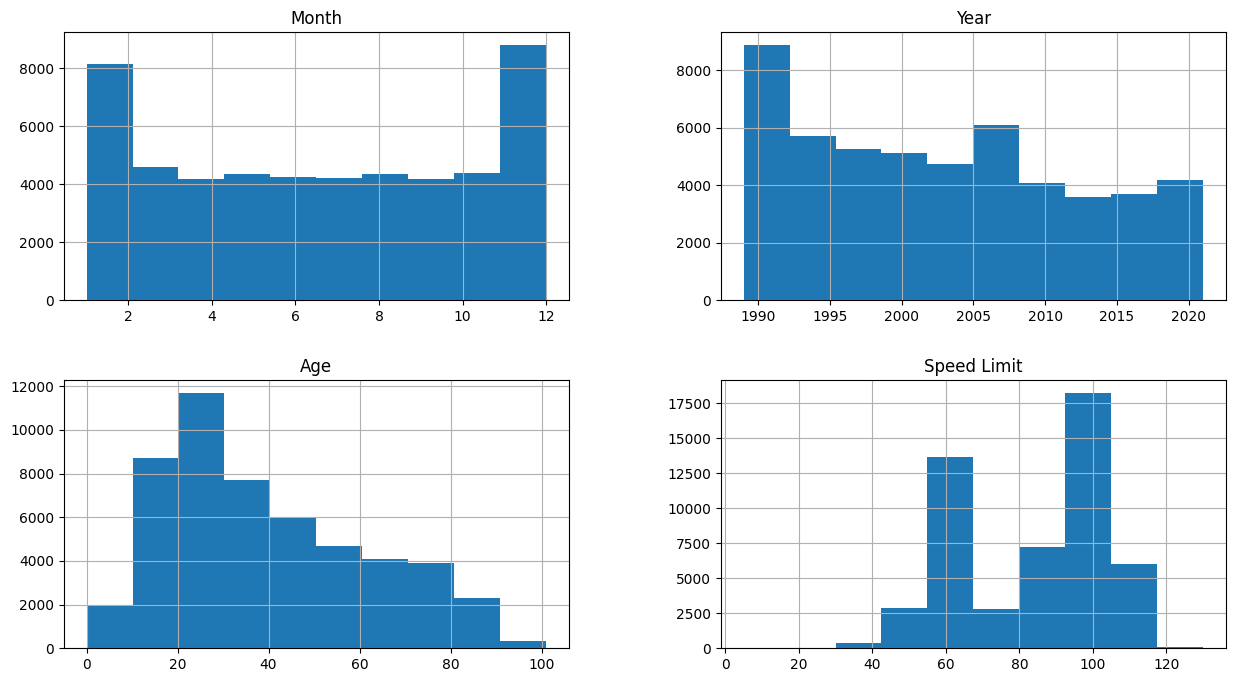

In [5]:
df.hist(figsize=(15, 8))


<Axes: xlabel='Bus Involvement'>

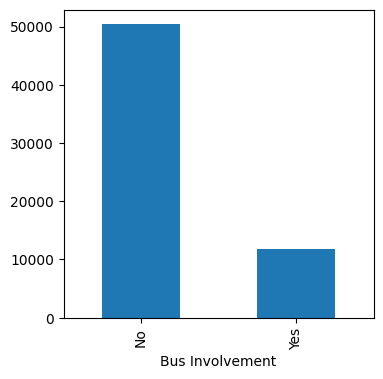

In [19]:
df['Road User'].value_counts().plot(kind='bar', figsize=(4, 4))

<Axes: xlabel='Bus Involvement'>

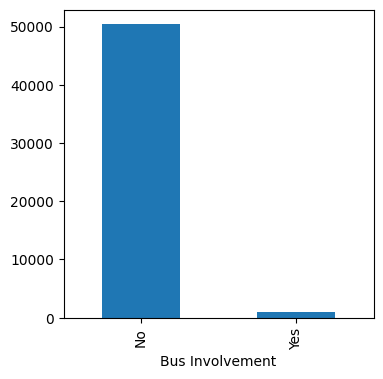

In [20]:
df['Bus Involvement'].value_counts().plot(kind='bar', figsize=(4, 4))

### Variáveis

*Variáveis categóricas ordinais*
- Age Group
- Month
- Year

*Variáveis categóricas nominais*
- Time of day
- Day of week
- Dayweek
- Crash Type
- Road User
- Gender
- State
- Bus Involvement
- Articulated Truck Involvement
- Christmas Period
- Easter Period

*Variáveis quantitativas (que podem ser usadas em encoding)*
- Time
- Age
- Speed Limit

### Problemas de classificação

**Previsão do Tipo de Acidente** <br />
**Problema:** _Classificar o tipo de acidente como "Single" ou "Multiple" (coluna Crash Type) com base em fatores como Time of day, Day of week, Speed Limit, Road User, etc._

**Previsão de Involvimento de um Ônibus**  <br />
**Problema:** _Classificar se um acidente envolveu um ônibus ou não (coluna Bus Involvement) com base em fatores como Time, Crash Type, Speed Limit, State, etc._

**Previsão do Usuário da Estrada (Pedestre, Motorista, etc.)**  <br />
**Problema:** _Classificar o tipo de usuário da estrada envolvido no acidente (coluna Road User), com base em variáveis como Time, Speed Limit, Crash Type, State, etc._

**Previsão do Estado (Estado da Austrália) onde o Acidente Ocorreu**  <br />
**Problema:** _Classificar em qual estado ocorreu o acidente (coluna State) com base em variáveis como Speed Limit, Crash Type, Road User, Time of day, etc._

### Problemas de regressão

**Previsão da Velocidade Limite (Speed Limit)** <br />
**Problema:** _Prever o valor da velocidade limite na área onde ocorreu o acidente (coluna Speed Limit) com base em variáveis como Time, Crash Type, Day of week, Road User, Age Group, State, etc._

**Previsão da Idade da Pessoa Envolvida** <br />
**Problema:** _Prever a idade (coluna Age) da pessoa envolvida no acidente, com base em variáveis como Time, Crash Type, Road User, State, etc._

**Previsão do Horário do Acidente (Time)** <br />
**Problema:** _Prever o horário exato do acidente (coluna Time) com base em variáveis como Crash Type, Road User, Speed Limit, Dayweek, etc._

**Previsão do Ano do Acidente** <br />
**Problema:** _Prever em que ano ocorreu o acidente (coluna Year) com base em fatores como Crash Type, Age, Road User, Speed Limit, etc._

### Criando o nosso modelo

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_encoded = df.copy() # todos os valores já codificados (categóricos transformados em numéricos através do encoding)

for column in df_encoded:
    if(column not in ['Speed Limit', 'Age', 'Year', 'Month']):
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

df_encoded_and_orginal = df.copy() # todos os valores originais em conjunto com os valores codificados

for column in df_encoded_and_orginal:
    if(column not in ['Speed Limit', 'Age', 'Year', 'Month']):
        df_encoded_and_orginal[f'{column} encoded'] = label_encoder.fit_transform(df_encoded_and_orginal[column])

# Organiza a tabela de forma que os valores codificados fiquem ao lado dos valores originais
df_encoded_and_orginal = df_encoded_and_orginal.reindex(columns=sorted(df_encoded_and_orginal.columns))


df_encoded


,Time of day,Day of week,Month,Year,Dayweek,Crash Type,Road User,Gender,Age,Age Group,State,Speed Limit,Bus Involvement,Articulated Truck Involvement,Christmas Period,Easter Period
1,1,1,9,2021,2,0,6,0,28,2,4,110,0,0,0,0
5,1,1,9,2021,2,0,2,1,19,1,3,100,0,0,0,0
6,1,1,9,2021,2,1,0,0,20,1,7,100,0,0,0,0
9,1,1,9,2021,2,1,0,1,47,3,3,60,0,0,0,0
10,1,0,9,2021,4,1,0,1,24,1,4,80,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,0,0,1,1989,6,1,4,0,5,0,1,60,1,0,0,0
52839,0,0,1,1989,1,1,4,1,19,1,7,110,0,0,1,0
52840,0,0,1,1989,1,1,4,1,17,1,7,110,0,0,1,0
52841,0,0,1,1989,1,1,4,1,17,1,7,110,0,0,1,0


In [10]:
df_encoded_and_orginal

,Age,Age Group,Age Group encoded,Articulated Truck Involvement,Articulated Truck Involvement encoded,Bus Involvement,Bus Involvement encoded,Christmas Period,Christmas Period encoded,Crash Type,Crash Type encoded,Day of week,Day of week encoded,Dayweek,Dayweek encoded,Easter Period,Easter Period encoded,Gender,Gender encoded,Month,Road User,Road User encoded,Speed Limit,State,State encoded,Time of day,Time of day encoded,Year
1,28,26_to_39,2,No,0,No,0,No,0,Multiple,0,Weekend,1,Saturday,2,No,0,Female,0,9,Pedestrian,6,110,SA,4,Night,1,2021
5,19,17_to_25,1,No,0,No,0,No,0,Multiple,0,Weekend,1,Saturday,2,No,0,Male,1,9,Motorcycle rider,2,100,Qld,3,Night,1,2021
6,20,17_to_25,1,No,0,No,0,No,0,Single,1,Weekend,1,Saturday,2,No,0,Female,0,9,Driver,0,100,WA,7,Night,1,2021
9,47,40_to_64,3,No,0,No,0,No,0,Single,1,Weekend,1,Saturday,2,No,0,Male,1,9,Driver,0,60,Qld,3,Night,1,2021
10,24,17_to_25,1,No,0,No,0,No,0,Single,1,Weekday,0,Thursday,4,No,0,Male,1,9,Driver,0,80,SA,4,Night,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,5,0_to_16,0,No,0,Yes,1,No,0,Single,1,Weekday,0,Wednesday,6,No,0,Female,0,1,Passenger,4,60,NSW,1,Day,0,1989
52839,19,17_to_25,1,No,0,No,0,Yes,1,Single,1,Weekday,0,Monday,1,No,0,Male,1,1,Passenger,4,110,WA,7,Day,0,1989
52840,17,17_to_25,1,No,0,No,0,Yes,1,Single,1,Weekday,0,Monday,1,No,0,Male,1,1,Passenger,4,110,WA,7,Day,0,1989
52841,17,17_to_25,1,No,0,No,0,Yes,1,Single,1,Weekday,0,Monday,1,No,0,Male,1,1,Passenger,4,110,WA,7,Day,0,1989


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df_to_predict_crash_type = df_encoded[['Day of week', 'Time of day', 'Road User', 'Crash Type']]

# Separando as features e o target
X = df_to_predict_crash_type.drop('Crash Type', axis=1) 
y = df_to_predict_crash_type['Crash Type']

# Separando os dados entre treino e teste das features e do alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Algoritmo de classificação (criação e treinamento)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Utilizando o algoritmo para prever os dados de test
y_pred = model.predict(X_test)

# Métricas de avaliação (accuracy_score e classification_report)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6589197611010127
              precision    recall  f1-score   support

           0       0.60      0.71      0.65      6918
           1       0.72      0.62      0.67      8486

    accuracy                           0.66     15404
   macro avg       0.66      0.66      0.66     15404
weighted avg       0.67      0.66      0.66     15404



In [62]:

df_to_predict_crash_type

,Day of week,Time of day,Road User,Crash Type
1,1,1,6,0
5,1,1,2,0
6,1,1,0,1
9,1,1,0,1
10,0,1,0,1
...,...,...,...,...
52838,0,0,4,1
52839,0,0,4,1
52840,0,0,4,1
52841,0,0,4,1


# Bus involvement Análise

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df_to_predict_bus_involvement = df_encoded[['Day of week', 'Time of day', 'Road User', 'Crash Type', 'Speed Limit','Month','Bus Involvement']]

# Separando as features e o target
X = df_to_predict_bus_involvement.drop('Bus Involvement', axis=1) 
y = df_to_predict_bus_involvement['Bus Involvement']

# Separando os dados entre treino e teste das features e do alvo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Algoritmo de classificação (criação e treinamento)
model = LogisticRegression() 
model.fit(X_train, y_train)

# Utilizando o algoritmo para prever os dados de test
y_pred = model.predict(X_test)

# Métricas de avaliação (accuracy_score e classification_report)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia do modelo: 0.98
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15131
           1       0.00      0.00      0.00       273

    accuracy                           0.98     15404
   macro avg       0.49      0.50      0.50     15404
weighted avg       0.96      0.98      0.97     15404

Matriz de Confusão:
[[15131     0]
 [  273     0]]
